In [122]:
#importamos las librerias necesarias para trabajar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import features
from branca.colormap import linear
from unidecode import unidecode






In [123]:
#Dataframe con el coste de vivienda por m2 segun distritos de madrid

df_precios_vivienda_m2_por_distrito = pd.read_csv('data/precio_vivienda_m2_por_distrito.csv')
df_precios_vivienda_m2_por_distrito


,distrito,url,m2_medio,m2_estudio_q1hab
0,Centro,centro,5941,5802
1,Tetuán,tetuan,4443,4675
2,Barrio de Salamanca,barrio-de-salamanca,7157,7504
3,Carabanchel,carabanchel,2501,3100
4,Chamberí,chamberi,6228,6471
5,Chamartín,chamartin,5590,5671
6,Hortaleza,hortaleza,4233,4592
7,Latina,latina,2654,2927
8,Ciudad Lineal,ciudad-lineal,3456,4024
9,Arganzuela,arganzuela,4362,4601


In [124]:

#calculamos primero la media de precios del m2 de un estudio
media_m2_estudio_q1hab = df_precios_vivienda_m2_por_distrito['m2_estudio_q1hab'].mean()
print('La media de m2_estudio_q1hab es:', media_m2_estudio_q1hab)

La media de m2_estudio_q1hab es: 4449.35


In [125]:
#Dataframe con el precio medio del suelo urbanizable para poblaciones de mas de 50000 habitantes
df_precio_medio_suelo_pob_mas_50000 = pd.read_csv('data/comunidad_madrid_precio_suelo_urbanizable.csv')
df_precio_medio_suelo_pob_mas_50000 


,comunidad_autonoma,Año 2022
0,TOTAL NACIONAL,240.19
1,Andalucía,241.66
2,Almería,210.83
3,Cádiz,146.03
4,Córdoba,182.91
...,...,...
57,Álava,324.3
58,Guipúzcoa,.
59,Vizcaya,213.5
60,Rioja (La),n.s.


In [126]:
#Precio medio del suelo urbanizable en la C.Madrid para municipios de 50000habitantes
precio_m2_suelo_madrid_mas_50000hab= float(df_precio_medio_suelo_pob_mas_50000 [df_precio_medio_suelo_pob_mas_50000 ['comunidad_autonoma'].str.contains('Madrid')]['Año 2022'].iloc[0])
precio_m2_suelo_madrid_mas_50000hab

554.63

In [127]:
#Dataframe con la poblacion de municipios con mas de 50000 habitantes
df_municipios_con_mas_50000_hab = pd.read_csv('data/pob_municipios_madrid_mas_50000hab.csv')
df_municipios_con_mas_50000_hab 

,Municipios,Sexo,Periodo,Total
0,Madrid,Total,2022,6750336
1,Alcalá de Henares,Total,2022,196888
2,Alcobendas,Total,2022,117041
3,Alcorcón,Total,2022,170296
4,Aranjuez,Total,2022,59762
5,Arganda del Rey,Total,2022,57553
6,Boadilla del Monte,Total,2022,62627
7,Collado Villalba,Total,2022,64263
8,Colmenar Viejo,Total,2022,53389
9,Coslada,Total,2022,80596


In [128]:
#Dataframe con precio medio de municipios de mas de 50000 habitantes en la C.Madrid
df_precio_m2_municipios_mas_50000_hab = pd.read_csv('data/precio_m2_vivienda_mad_poblaciones_mas_50000.csv')
df_precio_m2_municipios_mas_50000_hab

,municipio,precio_m2
0,Madrid,4290
1,Alcalá de Henares,2145
2,Móstoles,2033
3,Parla,1656
4,Getafe,2266
5,Torrejón de Ardoz,1989
6,Fuenlabrada,1973
7,Leganés,2193
8,Alcorcón,2392
9,Valdemoro,1883


In [129]:
#Dataframe con relacion de municipios de C.madrid con mas de 50000 habitantes y sus precios medios de m2

df_municipios_con_mas_50000_hab['municipio_clean'] = df_municipios_con_mas_50000_hab['Municipios'].str.lower().str.replace(' ', '')
df_precio_m2_municipios_mas_50000_hab['municipio_clean'] = df_precio_m2_municipios_mas_50000_hab['municipio'].str.lower().str.replace(' ', '')

df_relacion_municipios_500000_m2 = pd.merge(df_municipios_con_mas_50000_hab, df_precio_m2_municipios_mas_50000_hab, left_on='municipio_clean', right_on='municipio_clean', how='inner')
df_relacion_municipios_500000_m2


#falta calcular diferencia de m2 cuadrado precio respecto a madrid ciudad, esa diferencia en porcentaje añadirla al precio suelo y ya tenemos estimacion

,Municipios,Sexo,Periodo,Total,municipio_clean,municipio,precio_m2
0,Madrid,Total,2022,6750336,madrid,Madrid,4290
1,Alcalá de Henares,Total,2022,196888,alcaládehenares,Alcalá de Henares,2145
2,Alcobendas,Total,2022,117041,alcobendas,Alcobendas,2850
3,Alcorcón,Total,2022,170296,alcorcón,Alcorcón,2392
4,Aranjuez,Total,2022,59762,aranjuez,Aranjuez,1696
5,Collado Villalba,Total,2022,64263,colladovillalba,Collado Villalba,2110
6,Coslada,Total,2022,80596,coslada,Coslada,2439
7,Fuenlabrada,Total,2022,189891,fuenlabrada,Fuenlabrada,1973
8,Getafe,Total,2022,183219,getafe,Getafe,2266
9,Leganés,Total,2022,186660,leganés,Leganés,2193


In [130]:
precio_medio_pob_mas50000hab = int(df_relacion_municipios_500000_m2['precio_m2'].mean())
print('El precio medio del del m2 construido por municipios de mas de 50000 es: ', precio_medio_pob_mas50000hab)


# Calcular el precio promedio del metro cuadrado en Madrid
precio_promedio_madrid = df_relacion_municipios_500000_m2.loc[df_relacion_municipios_500000_m2['Municipios'] == 'Madrid', 'precio_m2'].values[0]
print(precio_promedio_madrid)
# Calcular la diferencia porcentual
diferencia_porcentual = int(((precio_promedio_madrid - precio_medio_pob_mas50000hab) / precio_medio_pob_mas50000hab) * 100)
print('El precio del m2 en madrid es un :', diferencia_porcentual ,'% mas caro')


El precio medio del del m2 construido por municipios de mas de 50000 es:  2491
4290
El precio del m2 en madrid es un : 72 % mas caro


In [131]:
##  CONCLUSIONES
# Costo fijo de casa contenedor full equipada
precio_passivhaus_m2= 1820
type(precio_m2_suelo_madrid_mas_50000hab)
#Costo medio estimado de m2 suelo en madrid
valor_medio_estimado_suelo_madrid = int(precio_m2_suelo_madrid_mas_50000hab)  + (int(precio_m2_suelo_madrid_mas_50000hab) * int(diferencia_porcentual)  / 100)

# Costo casa contenedor + coste suelo aproximado del suelo urbanizable en madrid
precio_casa_contendedor_madrid= valor_medio_estimado_suelo_madrid + precio_passivhaus_m2

# calcula la media de la columna m2_medio
minimo_m2_medio = df_precios_vivienda_m2_por_distrito['m2_medio'].min()

# calcula la variacion de cada valor respecto al valor medio
df_precios_vivienda_m2_por_distrito['porcentaje_variacion'] = ((df_precios_vivienda_m2_por_distrito['m2_medio'] - minimo_m2_medio) / minimo_m2_medio * 100).round(2)

df_precios_vivienda_m2_por_distrito['precio_m2_suelo'] = valor_medio_estimado_suelo_madrid + (valor_medio_estimado_suelo_madrid * df_precios_vivienda_m2_por_distrito['porcentaje_variacion'] / 100 )
df_precios_vivienda_m2_por_distrito['precio_m2_suelo'] = df_precios_vivienda_m2_por_distrito['precio_m2_suelo'].astype(int)
df_precios_vivienda_m2_por_distrito['precio_casa_contenedo_suelo_inc'] = df_precios_vivienda_m2_por_distrito['precio_m2_suelo'] +precio_passivhaus_m2
df_precios_vivienda_m2_por_distrito['distrito'] = df_precios_vivienda_m2_por_distrito['distrito'].replace('Barrio de Salamanca', 'Salamanca')

df_precios_vivienda_m2_por_distrito


,distrito,url,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc
0,Centro,centro,5941,5802,202.19,2879,4699
1,Tetuán,tetuan,4443,4675,125.99,2153,3973
2,Salamanca,barrio-de-salamanca,7157,7504,264.04,3468,5288
3,Carabanchel,carabanchel,2501,3100,27.21,1212,3032
4,Chamberí,chamberi,6228,6471,216.79,3018,4838
5,Chamartín,chamartin,5590,5671,184.33,2709,4529
6,Hortaleza,hortaleza,4233,4592,115.31,2051,3871
7,Latina,latina,2654,2927,34.99,1286,3106
8,Ciudad Lineal,ciudad-lineal,3456,4024,75.79,1675,3495
9,Arganzuela,arganzuela,4362,4601,121.87,2114,3934


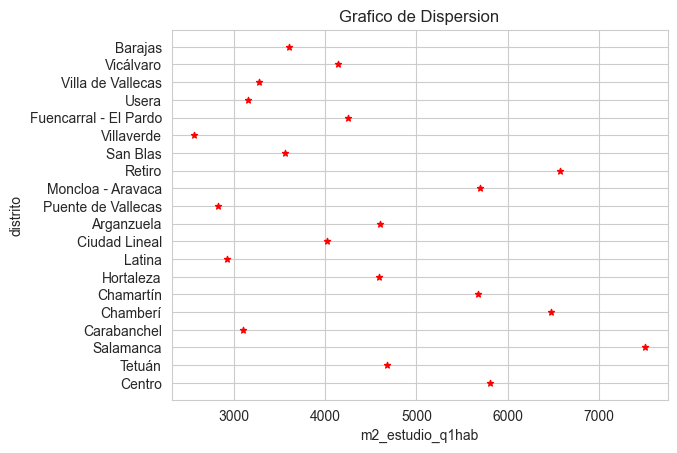

In [132]:
#vamos a hacer un grafico tipo mapa para representar los precios a continuacion teniendo en cuenta nuestra tabla precio m2 y distritos:


#grafico de dispersion para observar como varia el precio entre los distritos:
df_precios_vivienda_m2_por_distrito.plot.scatter(y="distrito", x="m2_estudio_q1hab", c="red", marker= "*")
plt.title("Grafico de Dispersion");

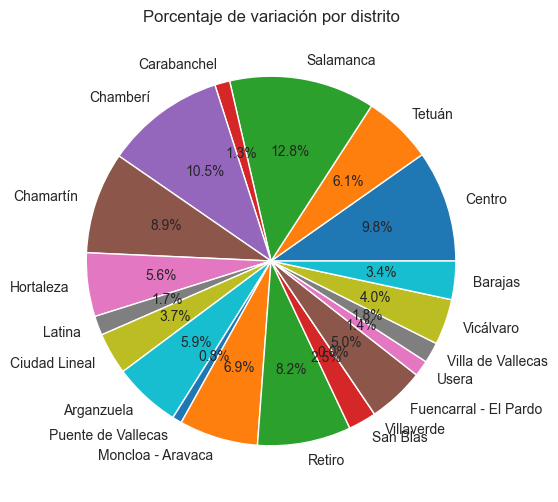

In [133]:

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
plt.title('Porcentaje de variación por distrito')

plt.pie(df_precios_vivienda_m2_por_distrito['porcentaje_variacion'], labels=df_precios_vivienda_m2_por_distrito['distrito'], autopct='%1.1f%%')

plt.show()

In [134]:
#Dataframe con renta media por codigo de distrito de la ciudad de madrid
df_renta_media_es = pd.read_csv('data/renta_media_por_municipio_CMadrid.csv',encoding='latin-1', sep=';')

municipios_madrid = df_renta_media_es[df_renta_media_es["Municipios"].str.contains(r"\d+ \bMadrid\b")].copy()
municipios_madrid.loc[municipios_madrid.index, "Municipios"] = municipios_madrid["Municipios"].str.replace(r"^\d* ", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Distritos"] = municipios_madrid["Distritos"].str.replace(r"\d+\sMadrid\s", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Secciones"] = municipios_madrid["Secciones"].str.replace(r"\d+\sMadrid\s", "", regex=True)
municipios_madrid.loc[municipios_madrid.index, "Distritos"] = municipios_madrid["Distritos"].str.replace(r'^distrito\s?0?', "", regex=True)
municipios_madrid['Indicadores de renta media y mediana'] = municipios_madrid['Total']



renta_media_distritos_madrid_2020 = municipios_madrid[municipios_madrid['Secciones'].isna()].dropna(subset=['Distritos']).drop('Secciones', axis=1).drop('Total', axis=1).drop('Periodo', axis=1)
renta_media_distritos_madrid_2020.rename(columns={"Indicadores de renta media y mediana": "renta_media"}, inplace=True)
renta_media_distritos_madrid_2020

,Municipios,Distritos,renta_media
1274,Madrid,1,36.984
1386,Madrid,2,45.310
1496,Madrid,3,56.302
1592,Madrid,4,60.401
1719,Madrid,5,69.202
1821,Madrid,6,38.799
1940,Madrid,7,55.757
2065,Madrid,8,54.292
2250,Madrid,9,62.202
2336,Madrid,10,32.957


In [135]:
#Dataframe para relacionar codigos de distrito con Nombre del distrito
df_codigos_distritos = pd.read_csv('data/codigos_distritos.csv')
df_codigos_distritos

,COD_DIS,NOMBRE
0,1,Centro
1,2,Arganzuela
2,3,Retiro
3,4,Salamanca
4,5,Chamartín
5,6,Tetuán
6,7,Chamberí
7,8,Fuencarral - El Pardo
8,9,Moncloa - Aravaca
9,10,Latina


In [136]:
# Modificamos la columna "Distritos" del primer dataframe
renta_media_distritos_madrid_2020["Distritos"] = renta_media_distritos_madrid_2020["Distritos"].str.replace("distrito ", "").astype(int)
df_renta_por_nombre_distrito = pd.merge(renta_media_distritos_madrid_2020, df_codigos_distritos, left_on="Distritos", right_on="COD_DIS")
df_renta_por_nombre_distrito.drop("COD_DIS", axis=1, inplace=True)

df_renta_por_nombre_distrito


,Municipios,Distritos,renta_media,NOMBRE
0,Madrid,1,36.984,Centro
1,Madrid,2,45.310,Arganzuela
2,Madrid,3,56.302,Retiro
3,Madrid,4,60.401,Salamanca
4,Madrid,5,69.202,Chamartín
5,Madrid,6,38.799,Tetuán
6,Madrid,7,55.757,Chamberí
7,Madrid,8,54.292,Fuencarral - El Pardo
8,Madrid,9,62.202,Moncloa - Aravaca
9,Madrid,10,32.957,Latina


In [137]:
df_tabla_de_relaciones = pd.merge(df_renta_por_nombre_distrito, df_precios_vivienda_m2_por_distrito, left_on='NOMBRE', right_on='distrito')


df_tabla_de_relaciones.drop(['NOMBRE', 'url','Municipios'], axis=1, inplace=True)
df_tabla_de_relaciones['diferencia_eu_m2'] = df_tabla_de_relaciones['m2_estudio_q1hab'] - df_tabla_de_relaciones['precio_casa_contenedo_suelo_inc']
df_tabla_de_relaciones




,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
0,1,36.984,Centro,5941,5802,202.19,2879,4699,1103
1,2,45.310,Arganzuela,4362,4601,121.87,2114,3934,667
2,3,56.302,Retiro,5297,6578,169.43,2567,4387,2191
3,4,60.401,Salamanca,7157,7504,264.04,3468,5288,2216
4,5,69.202,Chamartín,5590,5671,184.33,2709,4529,1142
5,6,38.799,Tetuán,4443,4675,125.99,2153,3973,702
6,7,55.757,Chamberí,6228,6471,216.79,3018,4838,1633
7,8,54.292,Fuencarral - El Pardo,3986,4246,102.75,1931,3751,495
8,9,62.202,Moncloa - Aravaca,4777,5697,142.98,2315,4135,1562
9,10,32.957,Latina,2654,2927,34.99,1286,3106,-179


In [138]:
#Renta, una vez analizado que barrios son los que el m2 esta mas caro, extraemos renta media de la zona
# llegamos a la conclusion para que clase social es accesible o publico objetivo

df_distritos_con_m2_mas_barato = df_tabla_de_relaciones.query('diferencia_eu_m2 <= 0')
df_distritos_con_m2_mas_barato


,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
9,10,32.957,Latina,2654,2927,34.99,1286,3106,-179
12,13,27.714,Puente de Vallecas,2304,2821,17.19,1116,2936,-115
15,17,29.640,Villaverde,1966,2563,0.00,952,2772,-209


In [139]:
df_distritos_con_m2_mas_caro = df_tabla_de_relaciones.query('diferencia_eu_m2 >= 0')
df_distritos_con_m2_mas_caro


,Distritos,renta_media,distrito,m2_medio,m2_estudio_q1hab,porcentaje_variacion,precio_m2_suelo,precio_casa_contenedo_suelo_inc,diferencia_eu_m2
0,1,36.984,Centro,5941,5802,202.19,2879,4699,1103
1,2,45.310,Arganzuela,4362,4601,121.87,2114,3934,667
2,3,56.302,Retiro,5297,6578,169.43,2567,4387,2191
3,4,60.401,Salamanca,7157,7504,264.04,3468,5288,2216
4,5,69.202,Chamartín,5590,5671,184.33,2709,4529,1142
5,6,38.799,Tetuán,4443,4675,125.99,2153,3973,702
6,7,55.757,Chamberí,6228,6471,216.79,3018,4838,1633
7,8,54.292,Fuencarral - El Pardo,3986,4246,102.75,1931,3751,495
8,9,62.202,Moncloa - Aravaca,4777,5697,142.98,2315,4135,1562
10,11,30.890,Carabanchel,2501,3100,27.21,1212,3032,68


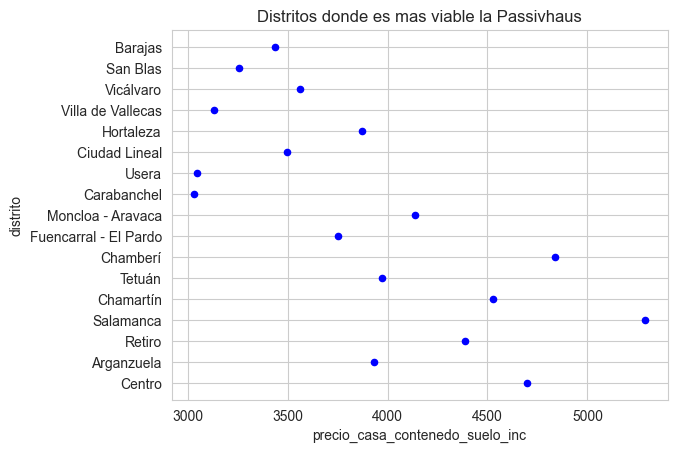

In [144]:

df_distritos_con_m2_mas_caro.plot.scatter(y="distrito", x="precio_casa_contenedo_suelo_inc", c="blue", marker= "o");
plt.title("Distritos donde es mas viable la Passivhaus")

plt.savefig('grafica_final.png')

plt.show()

In [141]:
#Esta grafica muestra los tres distritos mas rentables a la hora de comprar una passivhaus
# Definir nombre y URL del archivo SVG de los iconos personalizados

icon_name1 = 'my-icon1'
icon_url1 = 'https://ruta/a/la/imagen/centro.png'

icon_name2 = 'my-icon2'
icon_url2 = 'https://ruta/a/la/imagen/de/chamberi.png'

icon_name3 = 'my-icon3'
icon_url3 = 'https://ruta/a/la/imagen/de/chamartin.png'

# Crear los íconos personalizados

icon1 = features.CustomIcon(icon_url1, icon_size=(25, 41))
icon2 = features.CustomIcon(icon_url2, icon_size=(25, 41))
icon3 = features.CustomIcon(icon_url3, icon_size=(25, 41))

# Crear el mapa y agregar los marcadores con los íconos personalizados
map_cm = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

folium.Marker(location=[40.4168, -3.7038], popup='Centro de Madrid').add_to(map_cm)
folium.Marker(location=[40.4350, -3.7037], popup='Chamberí').add_to(map_cm)
folium.Marker(location=[40.4628, -3.6906], popup='Chamartín').add_to(map_cm)



# Mostrar el mapa
map_cm

In [143]:
#Este mapa de calor muestra los distritos segun su grado de rentabilidad de compra de passivehaus

df_tabla_de_relaciones['distrito'] = df_tabla_de_relaciones['distrito'].apply(lambda x: unidecode(x))
precios_dict = dict(zip(df_tabla_de_relaciones['distrito'], df_tabla_de_relaciones['precio_casa_contenedo_suelo_inc']))
colormap = linear.YlOrRd_09.scale(
    df_tabla_de_relaciones['precio_casa_contenedo_suelo_inc'].min(),
    df_tabla_de_relaciones['precio_casa_contenedo_suelo_inc'].max())

madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)
folium.GeoJson(
    'data/distritos-madrid.geojson',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': colormap(precios_dict[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

).add_to(madrid_map)


# Agregar la leyenda de la escala de colores al mapa
colormap.caption = 'Precio del m2'
colormap.add_to(madrid_map)
madrid_map


